In [12]:
# a. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Seting agar plot tampil inline
%matplotlib inline
# Setting style plot (opsional)
plt.style.use('seaborn-v0_8-darkgrid')
print("Pustaka berhasil diimpor!")

url_data ='/content/drive/MyDrive/Colab Notebooks/harga_mobil_bekas.csv'
try:
    df= pd.read_csv(url_data)
    print("Dataset berhasil dimuat!")
    print("Lima baris pertama data: ")
    display(df.head(5)) # menggunakan display() agar lebih rapih
except Exception as e:
    print(f"Gagal memuat dataset. Error:{e}")
    print("Pastikan URL dataset benar atau file sudah diupload.")

Pustaka berhasil diimpor!
Dataset berhasil dimuat!
Lima baris pertama data: 


,Merek,Model,Tahun,JarakTempuh,UkuranMesin,Transmisi,Harga
0,Toyota,Avanza,2018,75000,1300,Manual,145
1,Honda,Brio,2019,60000,1200,Automatic,155
2,Suzuki,Ertiga,2017,90000,1500,Manual,130
3,Toyota,Innova,2016,110000,2000,Automatic,240
4,Daihatsu,Xenia,2019,65000,1300,Manual,140



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Merek        72 non-null     object
 1   Model        72 non-null     object
 2   Tahun        72 non-null     int64 
 3   JarakTempuh  72 non-null     int64 
 4   UkuranMesin  72 non-null     int64 
 5   Transmisi    72 non-null     object
 6   Harga        72 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 4.1+ KB

Statistik Deskriptif:


,Tahun,JarakTempuh,UkuranMesin,Harga
count,72.000000,72.000000,72.000000,72.000000
mean,2018.763889,66930.555556,1545.833333,238.513889
std,1.989359,33165.537174,406.959700,176.695010
min,2015.000000,10000.000000,1000.000000,80.000000
25%,2017.000000,40000.000000,1300.000000,133.750000
50%,2019.000000,65000.000000,1500.000000,187.500000
75%,2020.000000,90000.000000,1500.000000,272.500000
max,2022.000000,150000.000000,2500.000000,1100.000000



Kolom 'Usia' berhasil ditambahkan.


,Tahun,Usia,Harga
0,2018,7,145
1,2019,6,155
2,2017,8,130
3,2016,9,240
4,2019,6,140



Jumlah Nilai Hilang per Kolom:
Merek          0
Model          0
Tahun          0
JarakTempuh    0
UkuranMesin    0
Transmisi      0
Harga          0
Usia           0
dtype: int64


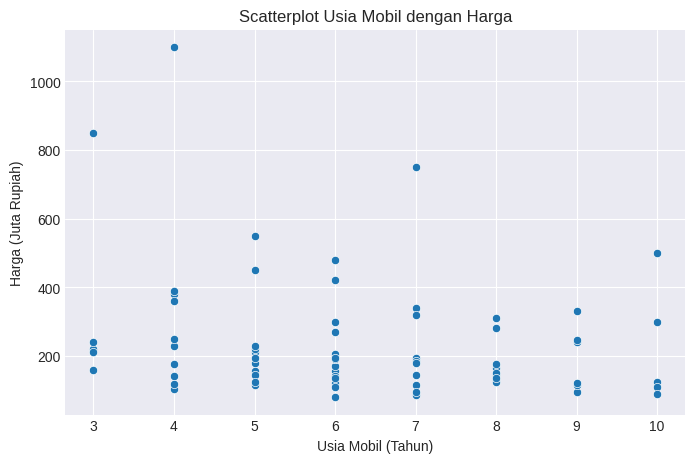

In [33]:
print("\nInformasi Dataset:")
df.info()

print("\nStatistik Deskriptif:")
display(df.describe())

tahun_sekarang = 2025
df['Usia'] = tahun_sekarang - df['Tahun']
print("\nKolom 'Usia' berhasil ditambahkan.")
display(df[['Tahun','Usia','Harga']].head())

print("\nJumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Usia', y='Harga')
plt.title('Scatterplot Usia Mobil dengan Harga')
plt.xlabel('Usia Mobil (Tahun)')
plt.ylabel('Harga (Juta Rupiah)')
plt.grid(True)
plt.show()


In [16]:
# Fitur untuk SLR hanya 'Usia'
X_slr = df[['Usia']]
y = df['Harga']
print("Fitur (X) untuk SLR:")
display(X_slr.head())
print("\nTarget (y):")
display(y.head())

Fitur (X) untuk SLR:


,Usia
0,7
1,6
2,8
3,9
4,6



Target (y):


,Harga
0,145
1,155
2,130
3,240
4,140


In [17]:
X_train_slr, X_test_slr, y_train, y_test = train_test_split(X_slr, y, test_size=0.2, random_state=42)
print(f"Ukuran data latih X: {X_train_slr.shape}")
print(f"Ukuran data uji X: {X_test_slr.shape}")
print(f"Ukuran data latih y: {y_train.shape}")
print(f"Ukuran data uji y: {y_test.shape}")

Ukuran data latih X: (57, 1)
Ukuran data uji X: (15, 1)
Ukuran data latih y: (57,)
Ukuran data uji y: (15,)


In [18]:
model_slr = LinearRegression()
model_slr.fit(X_train_slr, y_train)
print("Model SLR berhasil dilatih!")

Model SLR berhasil dilatih!


In [19]:
intercept_slr = model_slr.intercept_
coef_slr = model_slr.coef_[0] #Ambilelemen pertama karena hanya 1 fitur

print(f"Intercept (β₀): {intercept_slr:.2f}")
print(f"Koefisien Usia (β₁): {coef_slr:.2f}")
print(f"\nInterpretasi : ")
print(f"Model memprediksi harga dasar mobil (usia 0 tahun) sekitar {intercept_slr:.2f} Juta Rupiah.")
print(f"Setiap penambahan usia 1 tahun, harga mobil diprediksi turun sebeesar {abs(coef_slr):.2f} Juta Rupiah.")

Intercept (β₀): 363.71
Koefisien Usia (β₁): -19.36

Interpretasi : 
Model memprediksi harga dasar mobil (usia 0 tahun) sekitar 363.71 Juta Rupiah.
Setiap penambahan usia 1 tahun, harga mobil diprediksi turun sebeesar 19.36 Juta Rupiah.


In [20]:
y_pred_slr = model_slr.predict(X_test_slr)
mae_slr = mean_absolute_error(y_test, y_pred_slr)
mse_slr = mean_squared_error(y_test, y_pred_slr)
rmse_slr = np.sqrt(mse_slr)
r2_slr = r2_score(y_test, y_pred_slr)

print("\nMetrik Evaluasi SLR pada Data Uji:")
print(f"Mean Absolute Error (MAE): {mae_slr:.2f} Juta Rupiah")
print(f"Mean Squared Error (MSE): {mse_slr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_slr:.2f}")
print(f"R-squared (R²): {r2_slr:.2f}")

# Bandingkan dengan target
print("\nPerbandingan dengan Target:")
print(f"Target R² > 0.5: {'Tercapai' if r2_slr > 0.5 else 'Tidak Tercapai'}")
print(f"Target MAE < 30: {'Tercapai' if mae_slr < 30 else 'Tidak Tercapai'}")


Metrik Evaluasi SLR pada Data Uji:
Mean Absolute Error (MAE): 78.31 Juta Rupiah
Mean Squared Error (MSE): 7835.10
Root Mean Squared Error (RMSE): 88.52
R-squared (R²): -0.04

Perbandingan dengan Target:
Target R² > 0.5: Tidak Tercapai
Target MAE < 30: Tidak Tercapai


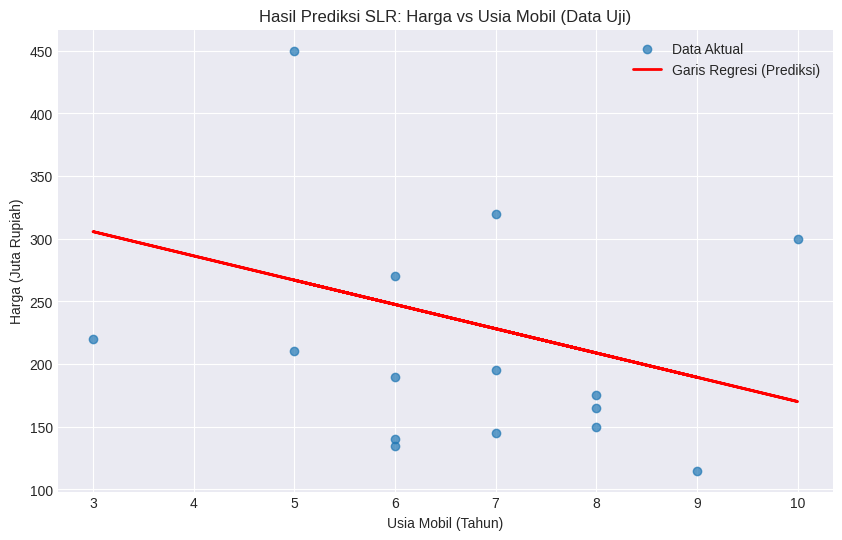

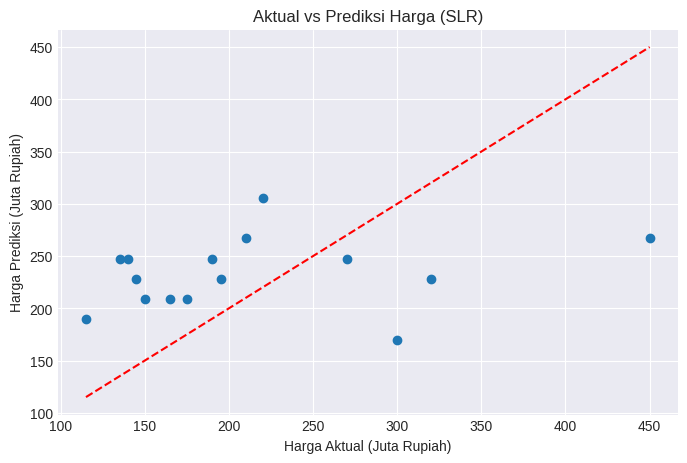

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_slr, y_test, alpha=0.7, label='Data Aktual')
plt.plot(X_test_slr, y_pred_slr, color='red', linewidth=2 ,label='Garis Regresi (Prediksi)')
plt.title('Hasil Prediksi SLR: Harga vs Usia Mobil (Data Uji)')
plt.xlabel('Usia Mobil (Tahun)')
plt.ylabel('Harga (Juta Rupiah)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(x=y_test, y=y_pred_slr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Aktual vs Prediksi Harga (SLR)')
plt.xlabel('Harga Aktual (Juta Rupiah)')
plt.ylabel('Harga Prediksi (Juta Rupiah)')
plt.grid(True)
plt.show()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Merek        72 non-null     object
 1   Model        72 non-null     object
 2   Tahun        72 non-null     int64 
 3   JarakTempuh  72 non-null     int64 
 4   UkuranMesin  72 non-null     int64 
 5   Transmisi    72 non-null     object
 6   Harga        72 non-null     int64 
 7   Usia         72 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 4.6+ KB

Statistik Deskriptif:


,Tahun,JarakTempuh,UkuranMesin,Harga,Usia
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,2018.763889,66930.555556,1545.833333,238.513889,6.236111
std,1.989359,33165.537174,406.959700,176.695010,1.989359
min,2015.000000,10000.000000,1000.000000,80.000000,3.000000
25%,2017.000000,40000.000000,1300.000000,133.750000,5.000000
50%,2019.000000,65000.000000,1500.000000,187.500000,6.000000
75%,2020.000000,90000.000000,1500.000000,272.500000,8.000000
max,2022.000000,150000.000000,2500.000000,1100.000000,10.000000



Kolom 'Usia' berhasil ditambahkan.


,Tahun,Usia,Harga
0,2018,7,145
1,2019,6,155
2,2017,8,130
3,2016,9,240
4,2019,6,140



Jumlah Nilai Hilang per Kolom:
Merek          0
Model          0
Tahun          0
JarakTempuh    0
UkuranMesin    0
Transmisi      0
Harga          0
Usia           0
dtype: int64


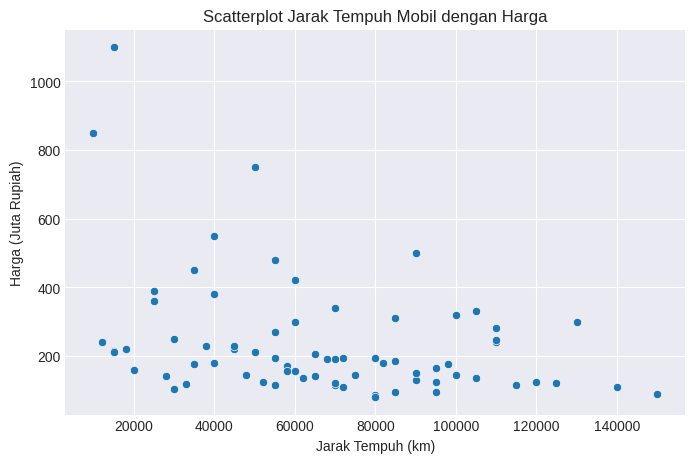

Fitur (X) untuk SLR:


,JarakTempuh
0,75000
1,60000
2,90000
3,110000
4,65000



Target (y):


,Harga
0,145
1,155
2,130
3,240
4,140


Ukuran data latih X: (57, 1)
Ukuran data uji X: (15, 1)
Ukuran data latih y: (57,)
Ukuran data uji y: (15,)
Model SLR berhasil dilatih!
Intercept (β₀): 380.02
Koefisien Jarak Tempuh (β₁): -0.00

Interpretasi : 
Model memprediksi harga mobil tanpa jarak tempuh (0 km) sekitar 380.02 Juta Rupiah.
Setiap pertambahan 1 km, harga mobil diprediksi turun sebesar 0.00 Juta Rupiah.

Metrik Evaluasi SLR pada Data Uji:
Mean Absolute Error (MAE): 75.16 Juta Rupiah
Mean Squared Error (MSE): 8944.60
Root Mean Squared Error (RMSE): 94.58
R-squared (R²): -0.19

Perbandingan dengan Target:
Target R² > 0.5: Tidak Tercapai
Target MAE < 30: Tidak Tercapai


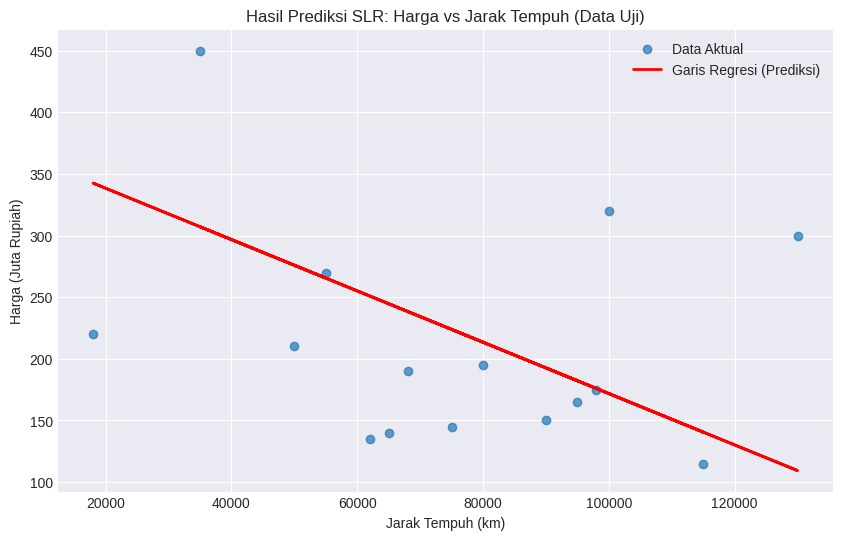

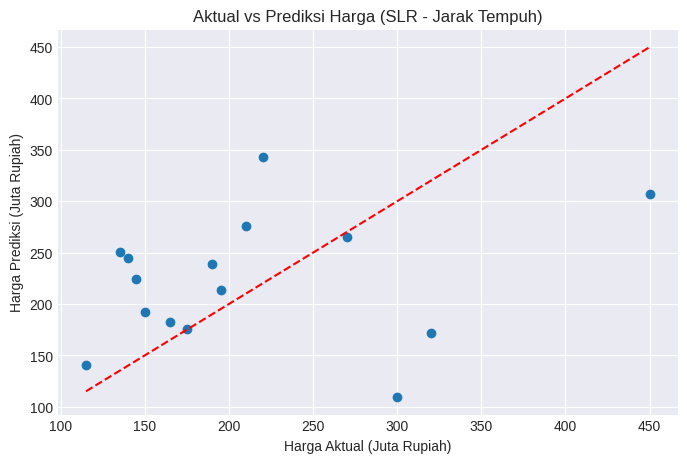

In [22]:
print("\nInformasi Dataset:")
df.info()

print("\nStatistik Deskriptif:")
display(df.describe())

tahun_sekarang = 2025
df['Usia'] = tahun_sekarang - df['Tahun']
print("\nKolom 'Usia' berhasil ditambahkan.")
display(df[['Tahun','Usia','Harga']].head())

print("\nJumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='JarakTempuh', y='Harga')
plt.title('Scatterplot Jarak Tempuh Mobil dengan Harga')
plt.xlabel('Jarak Tempuh (km)')
plt.ylabel('Harga (Juta Rupiah)')
plt.grid(True)
plt.show()

# Fitur untuk SLR hanya 'JarakTempuh'
X_slr = df[['JarakTempuh']]
y = df['Harga']
print("Fitur (X) untuk SLR:")
display(X_slr.head())
print("\nTarget (y):")
display(y.head())

X_train_slr, X_test_slr, y_train, y_test = train_test_split(X_slr, y, test_size=0.2, random_state=42)
print(f"Ukuran data latih X: {X_train_slr.shape}")
print(f"Ukuran data uji X: {X_test_slr.shape}")
print(f"Ukuran data latih y: {y_train.shape}")
print(f"Ukuran data uji y: {y_test.shape}")

model_slr = LinearRegression()
model_slr.fit(X_train_slr, y_train)
print("Model SLR berhasil dilatih!")

intercept_slr = model_slr.intercept_
coef_slr = model_slr.coef_[0]  # hanya satu fitur

print(f"Intercept (β₀): {intercept_slr:.2f}")
print(f"Koefisien Jarak Tempuh (β₁): {coef_slr:.2f}")
print(f"\nInterpretasi : ")
print(f"Model memprediksi harga mobil tanpa jarak tempuh (0 km) sekitar {intercept_slr:.2f} Juta Rupiah.")
print(f"Setiap pertambahan 1 km, harga mobil diprediksi turun sebesar {abs(coef_slr):.2f} Juta Rupiah.")

y_pred_slr = model_slr.predict(X_test_slr)
mae_slr = mean_absolute_error(y_test, y_pred_slr)
mse_slr = mean_squared_error(y_test, y_pred_slr)
rmse_slr = np.sqrt(mse_slr)
r2_slr = r2_score(y_test, y_pred_slr)

print("\nMetrik Evaluasi SLR pada Data Uji:")
print(f"Mean Absolute Error (MAE): {mae_slr:.2f} Juta Rupiah")
print(f"Mean Squared Error (MSE): {mse_slr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_slr:.2f}")
print(f"R-squared (R²): {r2_slr:.2f}")

# Bandingkan dengan target
print("\nPerbandingan dengan Target:")
print(f"Target R² > 0.5: {'Tercapai' if r2_slr > 0.5 else 'Tidak Tercapai'}")
print(f"Target MAE < 30: {'Tercapai' if mae_slr < 30 else 'Tidak Tercapai'}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_slr, y_test, alpha=0.7, label='Data Aktual')
plt.plot(X_test_slr, y_pred_slr, color='red', linewidth=2 ,label='Garis Regresi (Prediksi)')
plt.title('Hasil Prediksi SLR: Harga vs Jarak Tempuh (Data Uji)')
plt.xlabel('Jarak Tempuh (km)')
plt.ylabel('Harga (Juta Rupiah)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(x=y_test, y=y_pred_slr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Aktual vs Prediksi Harga (SLR - Jarak Tempuh)')
plt.xlabel('Harga Aktual (Juta Rupiah)')
plt.ylabel('Harga Prediksi (Juta Rupiah)')
plt.grid(True)
plt.show()


In [23]:
tahun_sekarang = 2025
df['Usia'] = tahun_sekarang- df['Tahun']
print("\nKolom 'Usia' berhasil ditambahkan.")
features_mlr = ['Usia', 'JarakTempuh', 'UkuranMesin']
X_mlr = df[features_mlr]
# target (y) tetap sama
# y = df['Harga']

print("Fitur (X) untuk MLR:")
display(X_mlr.head())


Kolom 'Usia' berhasil ditambahkan.
Fitur (X) untuk MLR:


,Usia,JarakTempuh,UkuranMesin
0,7,75000,1300
1,6,60000,1200
2,8,90000,1500
3,9,110000,2000
4,6,65000,1300


In [24]:
# Split data
X_train_mlr, X_test_mlr, y_train, y_test = train_test_split(X_mlr, y, test_size=0.2, random_state=42)
print(f"Ukuran data latih X_mlr: {X_train_mlr.shape}")
print(f"Ukuran data uji X_mlr: {X_test_mlr.shape}")

# Bangun dan latih model
model_mlr = LinearRegression()
model_mlr.fit(X_train_mlr, y_train)  # gunakan y_train


Ukuran data latih X_mlr: (57, 3)
Ukuran data uji X_mlr: (15, 3)


LinearRegression()


Matriks Korelasi Fitur:


,Usia,JarakTempuh,UkuranMesin
Usia,1.000000,0.953996,0.173676
JarakTempuh,0.953996,1.000000,0.071880
UkuranMesin,0.173676,0.071880,1.000000


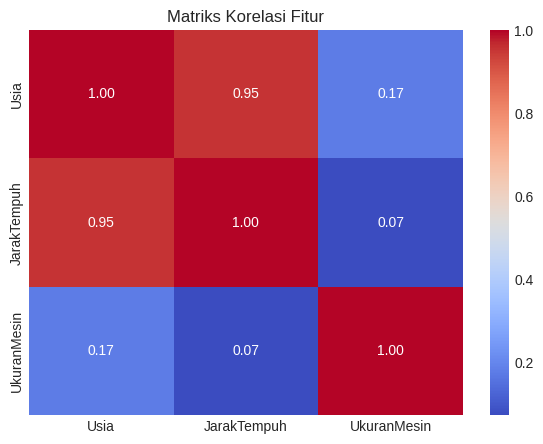

In [25]:
correlation_matrix = X_train_mlr.corr()
print("\nMatriks Korelasi Fitur:")
display(correlation_matrix)
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur')
plt.show()



In [26]:
# Ambil intercept dan koefisien dari model
intercept_mlr = model_mlr.intercept_
coeffs_mlr = model_mlr.coef_

# Daftar fitur (pastikan sesuai urutan training)
features_mlr = ['Usia', 'JarakTempuh', 'UkuranMesin']

print(f"Intercept (β₀): {intercept_mlr:.2f}")

# Tampilkan koefisien dalam DataFrame
coeffs_df = pd.DataFrame(coeffs_mlr, index=features_mlr, columns=['Koefisien (β)'])
print("\nKoefisien Fitur:")
display(coeffs_df)

# Interpretasi koefisien usia
print(f"\nInterpretasi (Contoh untuk 'Usia'):")
print(f"Dengan asumsi JarakTempuh dan UkuranMesin konstan,")

if 'Usia' in coeffs_df.index:
    usia_coef = coeffs_df.loc['Usia', 'Koefisien (β)']  # pastikan nama kolom cocok
    print(f"Setiap penambahan usia 1 tahun, harga mobil diprediksi berubah sebesar {usia_coef:.2f} Juta Rupiah")
else:
    print("Kolom 'Usia' tidak ditemukan dalam koefisien model.")


Intercept (β₀): -215.20

Koefisien Fitur:


,Koefisien (β)
Usia,90.991112
JarakTempuh,-0.007544
UkuranMesin,0.254028



Interpretasi (Contoh untuk 'Usia'):
Dengan asumsi JarakTempuh dan UkuranMesin konstan,
Setiap penambahan usia 1 tahun, harga mobil diprediksi berubah sebesar 90.99 Juta Rupiah


Pustaka berhasil diimpor!
Dataset berhasil dimuat!
Lima baris pertama data: 


,Merek,Model,Tahun,JarakTempuh,UkuranMesin,Transmisi,Harga
0,Toyota,Avanza,2018,75000,1300,Manual,145
1,Honda,Brio,2019,60000,1200,Automatic,155
2,Suzuki,Ertiga,2017,90000,1500,Manual,130
3,Toyota,Innova,2016,110000,2000,Automatic,240
4,Daihatsu,Xenia,2019,65000,1300,Manual,140



Kolom 'Usia' berhasil ditambahkan.


,Tahun,Usia,Harga
0,2018,7,145
1,2019,6,155
2,2017,8,130
3,2016,9,240
4,2019,6,140



Jumlah Nilai Hilang per Kolom:
Merek          0
Model          0
Tahun          0
JarakTempuh    0
UkuranMesin    0
Transmisi      0
Harga          0
Usia           0
dtype: int64


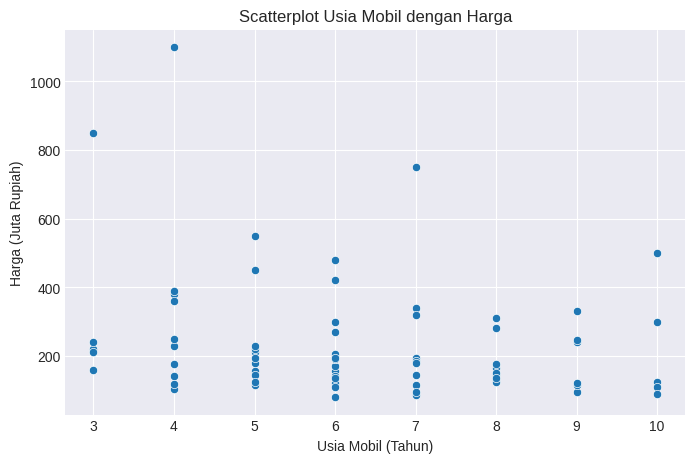


Perbandingan Performa Model:
Metode         | MAE (Juta)  | RMSE (Juta)  | R²   
---------------|-------------|--------------|-----
SLR (Usia)     | 96.89       | 14331.61     | -0.062
MLR (Usia+Fitur)| 41.58       | 3153.46      | 0.766

Analisis:
Model MLR menunjukkan performa yang lebih baik daripada SLR.
Target R² > 0.5: Tercapai
Target MAE < 30: Tidak Tercapai
Perlu dianalisis lebih lanjut (mungkin ada multikolinearitas atau fitur tidak relevan).


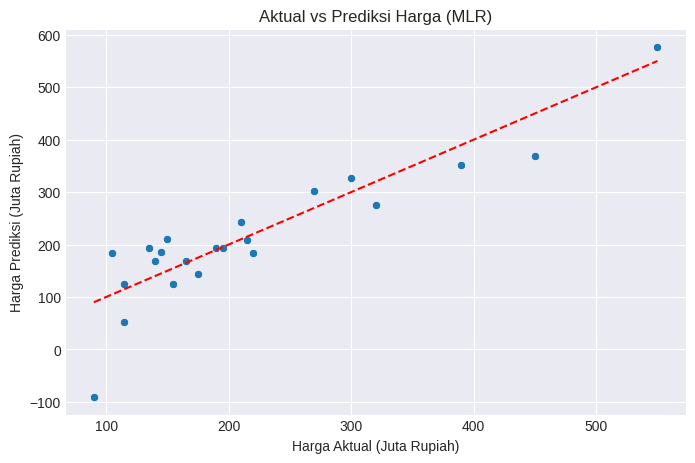

In [35]:
# a. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Seting agar plot tampil inline
%matplotlib inline
# Setting style plot (opsional)
plt.style.use('seaborn-v0_8-darkgrid')
print("Pustaka berhasil diimpor!")

url_data ='/content/drive/MyDrive/Colab Notebooks/harga_mobil_bekas.csv'
try:
    df= pd.read_csv(url_data)
    print("Dataset berhasil dimuat!")
    print("Lima baris pertama data: ")
    display(df.head(5)) # menggunakan display() agar lebih rapih
except Exception as e:
    print(f"Gagal memuat dataset. Error:{e}")
    print("Pastikan URL dataset benar atau file sudah diupload.")

tahun_sekarang = 2025
df['Usia'] = tahun_sekarang - df['Tahun']
print("\nKolom 'Usia' berhasil ditambahkan.")
display(df[['Tahun','Usia','Harga']].head())

print("\nJumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Usia', y='Harga')
plt.title('Scatterplot Usia Mobil dengan Harga')
plt.xlabel('Usia Mobil (Tahun)')
plt.ylabel('Harga (Juta Rupiah)')
plt.grid(True)
plt.show()

# Split data
X_train_slr, X_test_slr, y_train, y_test = train_test_split(X_slr, y, test_size=0.3, random_state=42)
X_train_mlr, X_test_mlr, _, _ = train_test_split(X_mlr, y, test_size=0.3, random_state=42)

# === Model SLR ===
model_slr = LinearRegression()
model_slr.fit(X_train_slr, y_train)
y_pred_slr = model_slr.predict(X_test_slr)

# Evaluasi SLR
mae_slr = mean_absolute_error(y_test, y_pred_slr)
rmse_slr = mean_squared_error(y_test, y_pred_slr)
r2_slr = r2_score(y_test, y_pred_slr)

# === Model MLR ===
model_mlr = LinearRegression()
model_mlr.fit(X_train_mlr, y_train)
y_pred_mlr = model_mlr.predict(X_test_mlr)

# Evaluasi MLR
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
rmse_mlr = mean_squared_error(y_test, y_pred_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

# === Perbandingan Performa ===
print("\nPerbandingan Performa Model:")
print(f"{'Metode':<15}| {'MAE (Juta)':<12}| {'RMSE (Juta)':<13}| {'R²':<5}")
print(f"{'-'*15}|{'-'*13}|{'-'*14}|{'-'*5}")
print(f"{'SLR (Usia)':<15}| {mae_slr:<12.2f}| {rmse_slr:<13.2f}| {r2_slr:<.3f}")
print(f"{'MLR (Usia+Fitur)':<15}| {mae_mlr:<12.2f}| {rmse_mlr:<13.2f}| {r2_mlr:<.3f}")

# === Analisis Hasil ===
print("\nAnalisis:")
if r2_mlr > r2_slr and rmse_mlr < rmse_slr:
    print("Model MLR menunjukkan performa yang lebih baik daripada SLR.")
    print(f"Target R² > 0.5: {'Tercapai' if r2_mlr > 0.5 else 'Tidak Tercapai'}")
    print(f"Target MAE < 30: {'Tercapai' if mae_mlr < 30 else 'Tidak Tercapai'}")
else:
    print("Penambahan fitur pada MLR tidak secara signifikan meningkatkan performa dibandingkan SLR, atau bahkan memperburuk.")
print("Perlu dianalisis lebih lanjut (mungkin ada multikolinearitas atau fitur tidak relevan).")

# === Visualisasi ===
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_mlr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linestyle='--')
plt.title('Aktual vs Prediksi Harga (MLR)')
plt.xlabel('Harga Aktual (Juta Rupiah)')
plt.ylabel('Harga Prediksi (Juta Rupiah)')
plt.grid(True)
plt.show()

In [38]:
# a. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Setting agar plot tampil inline (khusus untuk Jupyter)
# %matplotlib inline  # hapus jika bukan di Jupyter
plt.style.use('seaborn-v0_8-darkgrid')
print("Pustaka berhasil diimpor!")

# b. Load data
url_data = '/content/drive/MyDrive/Colab Notebooks/harga_mobil_bekas.csv'
try:
    df = pd.read_csv(url_data)
    print("Dataset berhasil dimuat!")
    print("Lima baris pertama data:")
    display(df.head())
except Exception as e:
    print(f"Gagal memuat dataset. Error: {e}")

# c. Regresi Linear Sederhana dengan fitur Usia
tahun_sekarang = 2025
df['Usia'] = tahun_sekarang- df['Tahun']
print("\nKolom 'Usia' berhasil ditambahkan.")
features_mlr = ['Usia', 'JarakTempuh', 'UkuranMesin']
X_mlr = df[features_mlr]
# target (y) tetap sama
# y = df['Harga']
X_train_usia, X_test_usia, y_train_usia, y_test_usia = train_test_split(X_usia, y, test_size=0.2, random_state=42)

model_usia = LinearRegression()
model_usia.fit(X_train_usia, y_train_usia)
y_pred_usia = model_usia.predict(X_test_usia)

r2_usia = r2_score(y_test_usia, y_pred_usia)
mae_usia = mean_absolute_error(y_test_usia, y_pred_usia)
rmse_usia = np.sqrt(mean_squared_error(y_test_usia, y_pred_usia))

# d. Regresi Linear Sederhana dengan fitur JarakTempuh
X_jarak = df[['JarakTempuh']]
X_train_jarak, X_test_jarak, y_train_jarak, y_test_jarak = train_test_split(X_jarak, y, test_size=0.2, random_state=42)

model_jarak = LinearRegression()
model_jarak.fit(X_train_jarak, y_train_jarak)
y_pred_jarak = model_jarak.predict(X_test_jarak)

r2_jarak = r2_score(y_test_jarak, y_pred_jarak)
mae_jarak = mean_absolute_error(y_test_jarak, y_pred_jarak)
rmse_jarak = np.sqrt(mean_squared_error(y_test_jarak, y_pred_jarak))

# e. Perbandingan performa
print("\nPerbandingan Performa Model SLR:")
print(f"{'Metode':<15} | {'R²':<6} | {'MAE (juta)':<12} | {'RMSE (juta)'}")
print("-" * 50)
print(f"{'Usia':<15} | {r2_usia:.3f} | {mae_usia:.2f}       | {rmse_usia:.2f}")
print(f"{'JarakTempuh':<15} | {r2_jarak:.3f} | {mae_jarak:.2f}       | {rmse_jarak:.2f}")

# f. Analisis
print("\nAnalisis:")
if r2_jarak > r2_usia and rmse_jarak < rmse_usia:
    print("Fitur JarakTempuh memberikan prediksi yang lebih baik daripada Usia.")
elif r2_usia > r2_jarak and rmse_usia < rmse_jarak:
    print("Fitur Usia memberikan prediksi yang lebih baik daripada JarakTempuh.")
else:
    print("Kedua fitur memiliki kelebihan masing-masing, perlu eksplorasi lebih lanjut.")


Pustaka berhasil diimpor!
Dataset berhasil dimuat!
Lima baris pertama data:


,Merek,Model,Tahun,JarakTempuh,UkuranMesin,Transmisi,Harga
0,Toyota,Avanza,2018,75000,1300,Manual,145
1,Honda,Brio,2019,60000,1200,Automatic,155
2,Suzuki,Ertiga,2017,90000,1500,Manual,130
3,Toyota,Innova,2016,110000,2000,Automatic,240
4,Daihatsu,Xenia,2019,65000,1300,Manual,140



Kolom 'Usia' berhasil ditambahkan.

Perbandingan Performa Model SLR:
Metode          | R²     | MAE (juta)   | RMSE (juta)
--------------------------------------------------
Usia            | -0.043 | 78.31       | 88.52
JarakTempuh     | -0.191 | 75.16       | 94.58

Analisis:
Fitur Usia memberikan prediksi yang lebih baik daripada JarakTempuh.


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Target dan fitur
y = df['Harga']

# Model SLR (Usia)
X_slr = df[['Usia']]
X_train_slr, X_test_slr, y_train, y_test = train_test_split(X_slr, y, test_size=0.2, random_state=42)
model_slr = LinearRegression()
model_slr.fit(X_train_slr, y_train)
y_pred_slr = model_slr.predict(X_test_slr)
r2_slr = r2_score(y_test, y_pred_slr)
rmse_slr = np.sqrt(mean_squared_error(y_test, y_pred_slr))

# Model MLR lama (Usia, JarakTempuh, UkuranMesin)
X_mlr_old = df[['Usia', 'JarakTempuh', 'UkuranMesin']]
X_train_mlr_old, X_test_mlr_old, _, _ = train_test_split(X_mlr_old, y, test_size=0.2, random_state=42)
model_mlr_old = LinearRegression()
model_mlr_old.fit(X_train_mlr_old, y_train)
y_pred_mlr_old = model_mlr_old.predict(X_test_mlr_old)
r2_mlr_old = r2_score(y_test, y_pred_mlr_old)
rmse_mlr_old = np.sqrt(mean_squared_error(y_test, y_pred_mlr_old))

# Model MLR baru (Usia, JarakTempuh)
X_mlr_new = df[['Usia', 'JarakTempuh']]
X_train_mlr_new, X_test_mlr_new, _, _ = train_test_split(X_mlr_new, y, test_size=0.2, random_state=42)
model_mlr_new = LinearRegression()
model_mlr_new.fit(X_train_mlr_new, y_train)
y_pred_mlr_new = model_mlr_new.predict(X_test_mlr_new)
r2_mlr_new = r2_score(y_test, y_pred_mlr_new)
rmse_mlr_new = np.sqrt(mean_squared_error(y_test, y_pred_mlr_new))

# Tampilkan hasil perbandingan
print("Perbandingan Performa Model:")
print(f"{'Model':<20} | {'R²':<7} | {'RMSE':<10}")
print("-" * 42)
print(f"{'SLR (Usia)':<20} | {r2_slr:.3f}  | {rmse_slr:.3f}")
print(f"{'MLR Lama (3 fitur)':<20} | {r2_mlr_old:.3f}  | {rmse_mlr_old:.3f}")
print(f"{'MLR Baru (2 fitur)':<20} | {r2_mlr_new:.3f}  | {rmse_mlr_new:.3f}")

# Analisis sederhana
if r2_mlr_new > r2_mlr_old:
    print("\nMenghapus fitur UkuranMesin meningkatkan performa model.")
else:
    print("\nMenghapus fitur UkuranMesin menurunkan performa model.")


Perbandingan Performa Model:
Model                | R²      | RMSE      
------------------------------------------
SLR (Usia)           | -0.043  | 88.516
MLR Lama (3 fitur)   | 0.748  | 43.547
MLR Baru (2 fitur)   | -0.727  | 113.915

Menghapus fitur UkuranMesin menurunkan performa model.


In [9]:
# prompt: connect google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
